<a href="https://colab.research.google.com/github/KiNAYEONG/Academy-study/blob/main/ex03_callback_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 손글씨 데이터를 활용하여 다양한 딥러닝 모델을 설계해보자!
  - 0~9까지의 손글씨 데이터
  - 활성화함수 -> sigmoid, relu(vanishing gradient 방지)
  - 최적화함수 -> SGD(확률적경사하강법), Adam

- 모델링에 도움이 되는 callback 함수
(모델저장, 조기학습중단)

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 활성화함수 (relu), 최적화 함수(adam)


- 데이터로딩

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 학습용데이터 : 28*28 픽셀의 이미지데이터 6만장
# 평가용데이터 : 28*28 픽셀의 이미지데이터 1만장

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 정답데이터 확인 -> 클래스 개수 확인용!
np.unique(y_train)
# 0~9 까지 숫자를 가진다. -> 클래스 개수 10개 -> 다중분류

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

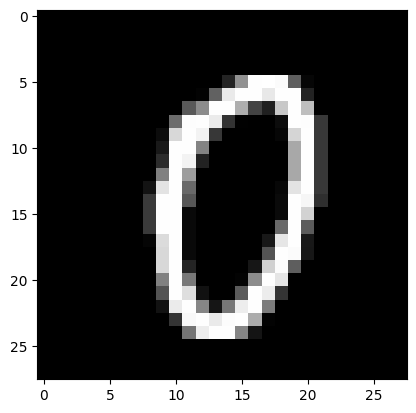

In [ ]:
# 문제데이터, 사진데이터 확인
plt.imshow(X_train[1000], cmap = 'gray')
# 흑백사진이구나~~
# 얼마나 흰색인지 검은색인지의 정도를 숫자로 가지고 있다.(0~255)
# 0에 가까울수록 검정색, 1에 가까울수록 흰색

In [ ]:
y_train[1001]

7

In [ ]:
# 스스로 딥러닝모델 설계
# 딥러닝 설계 도구 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer,Flatten
# InputLayer : 입력층 설정
# Flatten: 2차원의 사진데이터를 1차원으로 표현해주기 위한 클래스 for 선형모델 학습! 2차원은 선이 아니잖아~~

# 뼈대생성
model = Sequential()
# 입력층
model.add(InputLayer(shape=(28,28))) # 2차원
model.add(Flatten()) # 평평하게 만들어줌.

# 중간층 설계
# 32, 64, 128, 64, 32 -> 활성화함수 : relu
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))

# 출력층 설계 -> 다중분류 (units = 클래스의 개수)
model.add(Dense(10, activation="softmax"))

In [ ]:
# 학습방법 및 평가방법 -> 최적화함수: adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델학습
model.fit(X_train, y_train, epochs=10, validation_split=0.2)
# validation_split -> 학습데이터 내에서 검증데이터를 활용하여 일반화정도를 확인

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6736 - loss: 1.7959 - val_accuracy: 0.9056 - val_loss: 0.3305
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9127 - loss: 0.3039 - val_accuracy: 0.9329 - val_loss: 0.2379
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9363 - loss: 0.2236 - val_accuracy: 0.9362 - val_loss: 0.2234
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9487 - loss: 0.1805 - val_accuracy: 0.9408 - val_loss: 0.1986
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9508 - loss: 0.1739 - val_accuracy: 0.9492 - val_loss: 0.1844
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9569 - loss: 0.1524 - val_accuracy: 0.9527 - val_loss: 0.1782
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9592 - loss: 0.1381 - val_accuracy: 0.9525 - val_loss: 0.1698
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9637 - loss: 0.1231 - 

In [ ]:
model.history.history

{'accuracy': [0.8021875023841858,
  0.9167708158493042,
  0.9361458420753479,
  0.9473124742507935,
  0.9517708420753479,
  0.9568541646003723,
  0.9601041674613953,
  0.964062511920929,
  0.965791642665863,
  0.9679999947547913],
 'loss': [0.7712453603744507,
  0.2915824055671692,
  0.22341489791870117,
  0.1846434772014618,
  0.16916856169700623,
  0.15040704607963562,
  0.13837969303131104,
  0.12447530031204224,
  0.11865700036287308,
  0.11122690141201019],
 'val_accuracy': [0.9055833220481873,
  0.9329166412353516,
  0.9361666440963745,
  0.940833330154419,
  0.9491666555404663,
  0.9526666402816772,
  0.9524999856948853,
  0.9564999938011169,
  0.9574166536331177,
  0.9572499990463257],
 'val_loss': [0.3304547369480133,
  0.23786360025405884,
  0.22341035306453705,
  0.1985834389925003,
  0.18440428376197815,
  0.17818398773670197,
  0.16980530321598053,
  0.16349345445632935,
  0.16254466772079468,
  0.1692415028810501]}

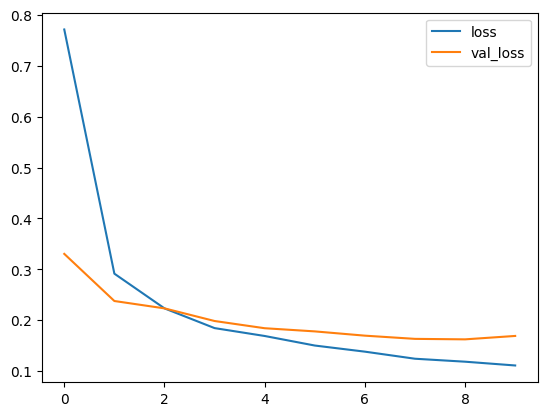

In [ ]:
# 일반화 확인을 위한 곡선
# 두 곡선 모두 오차가 하향하고 있으니 일반화
# 만약 오차가 하향하다가 다시 오른다면 과대적합이지~
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# 평가
model.evaluate(X_test, y_test)
# 94% 정확도를 가진다!

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9517 - loss: 0.2034


[0.17970198392868042, 0.95660001039505]

### callback 함수
- 모델저장
  - 딥러닝 모델 학습시 모델을 저장하는 기능
  - 지정된 epochs를 학습했을 시 과대적합이 되는 경우가 있다<br>  -> 중간의 일반화된 모델을 저장할 수 있는 기능<br>
  
- 조기학습중단
  - epochs를 크게 설정한 경우 일정 횟수 이상으로 모델의 성능이 개선되지 않는 경우가 있음 -> 시간 낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기학습중단

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint : 모델저장
# EarlyStopping : 조기학습중단

In [ ]:
# 모델 저장 객체 생성
# epoch : 현재 에포크 번호 epochs : 전체 에포크 번호
# 02d : 두 자리 숫자로 에포크 번호 표시
# 0.3f : 소수점 3자리까지 실수형태로
model_path = '/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_{epoch:02d}_{val_accuracy:0.3f}.hdf5.keras'
mc =ModelCheckpoint(filepath = model_path, # 모델의 저장 주소
                verbose = 1, # 로그 출력
                save_best_only = True, # 모델 성능이 최고점을 경신할때마다 저장
                monitor = 'val_accuracy') # 모델의 성능을 확인할 기준

In [ ]:
# 조기학습중단 객체 생성
es = EarlyStopping(monitor = 'val_accuracy',
                   verbose = 1, # 로그 출력
                   patience = 10)  # 모델성능 개선을 기다리는 최대 횟수

In [ ]:
# 뼈대생성
model = Sequential()
# 입력층
model.add(InputLayer(shape=(28,28))) # 2차원
model.add(Flatten()) # 평평하게 만들어줌.

# 중간층 설계
# 32, 64, 128, 64, 32 -> 활성화함수 : relu
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))

# 출력층 설계 -> 다중분류 (units = 클래스의 개수)
model.add(Dense(10, activation="softmax"))

In [ ]:
# 학습방법 및 평가방법 -> 최적화함수: adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 학습시 callback 함수를 사용한다.
model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
          callbacks = [mc,es])

Epoch 1/100
1488/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 1.3157
Epoch 1: val_accuracy improved from -inf to 0.90958, saving model to /content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_01_0.910.hdf5.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6813 - loss: 1.3099 - val_accuracy: 0.9096 - val_loss: 0.3148
Epoch 2/100
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9193 - loss: 0.2867
Epoch 2: val_accuracy improved from 0.90958 to 0.93708, saving model to /content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_02_0.937.hdf5.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9193 - loss: 0.2867 - val_accuracy: 0.9371 - val_loss: 0.2280
Epoch 3/100
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9340 - loss: 0.2269
Epoch 3: val_accuracy improved from 0.93708 to 0.93858, saving model to /content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_03_0.939.hdf5.keras
150

### 직접 작성한 손글씨 숫자 불러오기~


In [ ]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg
import numpy as np
import matplotlib.pyplot as plt

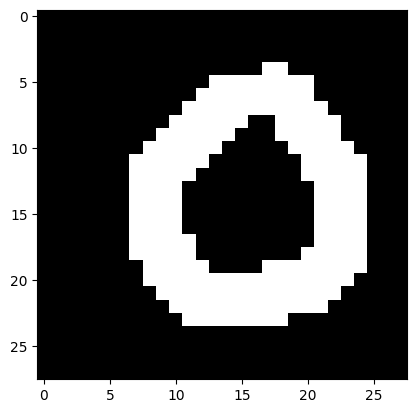

In [ ]:
# 이미지 불러오기
img = pimg.open("/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/data/0.png")
# 학습했던 이미지의 형태로 나의 손글씨 변경
# 컬러이미지를 흑백이미지로 변경 why? 흑백이미지로 학습했으니!
img = img.convert("L") # L : 흑백
plt.imshow(img,cmap='gray')

In [ ]:
# 이미지 타입을 배열로 변환
img_arr = np.array(img)
img_arr.shape

(28, 28)

In [ ]:
# 학습데이터에 적용했던 작업을 그대로 해줘야 함.
# 2차원 -> 1차원으로 변경 Flatten()
img_arr = img_arr.reshape(1,28,28) #(데이터의 개수, 가로, 세로)

In [ ]:
# 저장해 둔 best_model을 불러와서 예측
from tensorflow.keras.models import load_model
best_model = load_model("/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_32_0.966.hdf5.keras")

In [ ]:
# 예측
best_model.predict(img_arr)
# 결과값 : 0~9까지의 확률
# 부동소수점으로 나온 경우(9.1111-01)
# - 뒤의 숫자만큼 소수점을 앞으로 보내서 해석한다.
# 가독성을 위해 출력된 숫자
# e-뒤에 있는 숫자가 작을수록 큰 숫자~

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[1.00000000e+00, 0.00000000e+00, 9.63156421e-14, 2.26616695e-20,
        6.78493120e-21, 1.22967255e-17, 4.64552509e-14, 5.41141898e-29,
        9.82179477e-21, 3.68620810e-14]], dtype=float32)

In [ ]:
# 예측한 값 클래스값만 보고싶다면?
best_model.predict(img_arr).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


0